In [18]:
import tensorflow_datasets as tfds
import tensorflow as tf
import math
import numpy as np
from matplotlib import pyplot as plt

In [19]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [20]:
def normalize(images, labels):

  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels


train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

train_dataset =  train_dataset.cache()
test_dataset  =  test_dataset.cache()

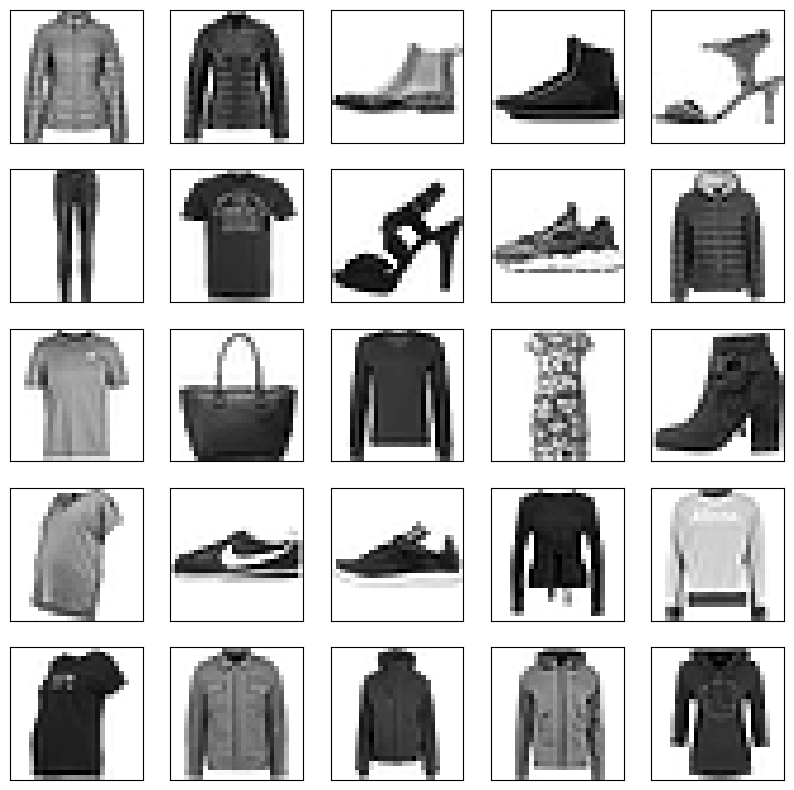

In [21]:
plt.figure(figsize=(10,10))
i = 0
for (image, label) in test_dataset.take(25):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    i += 1
plt.show()

In [22]:
BATCH_SIZE = 30
train_dataset = train_dataset.cache().repeat().shuffle(60000).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

In [23]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [24]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [25]:

hist = model.fit(train_dataset, epochs=40, steps_per_epoch=math.ceil(60000/BATCH_SIZE))

Epoch 1/40
2000/2000 [==============================] - 12s 3ms/step - loss: 0.4992 - accuracy: 0.8255
Epoch 2/40
2000/2000 [==============================] - 7s 3ms/step - loss: 0.3768 - accuracy: 0.8645
Epoch 3/40
2000/2000 [==============================] - 6s 3ms/step - loss: 0.3387 - accuracy: 0.8764
Epoch 4/40
2000/2000 [==============================] - 7s 4ms/step - loss: 0.3141 - accuracy: 0.8851
Epoch 5/40
2000/2000 [==============================] - 7s 4ms/step - loss: 0.2968 - accuracy: 0.8902
Epoch 6/40
2000/2000 [==============================] - 7s 4ms/step - loss: 0.2831 - accuracy: 0.8958
Epoch 7/40
2000/2000 [==============================] - 5s 3ms/step - loss: 0.2716 - accuracy: 0.8988
Epoch 8/40
2000/2000 [==============================] - 7s 3ms/step - loss: 0.2602 - accuracy: 0.9036
Epoch 9/40
2000/2000 [==============================] - 5s 3ms/step - loss: 0.2502 - accuracy: 0.9064
Epoch 10/40
2000/2000 [==============================] - 7s 3ms/step - loss: 0.24

In [26]:
from tensorflow_datasets.public_api import transform
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(10000/BATCH_SIZE))
print('Accuracy on test dataset:', test_accuracy)

334/334 [==============================] - 2s 4ms/step - loss: 0.4580 - accuracy: 0.8897
Accuracy on test dataset: 0.8896999955177307


In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [29]:
dataset,metadata=tfds.load('fashion_mnist',as_supervised=True,with_info=True)
train_dataset,test_dataset=dataset['train'],dataset['test']

In [30]:
validation_batches = train_dataset.batch(BATCH_SIZE)

2000/2000 [==============================] - 7s 4ms/step


(<Figure size 800x800 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

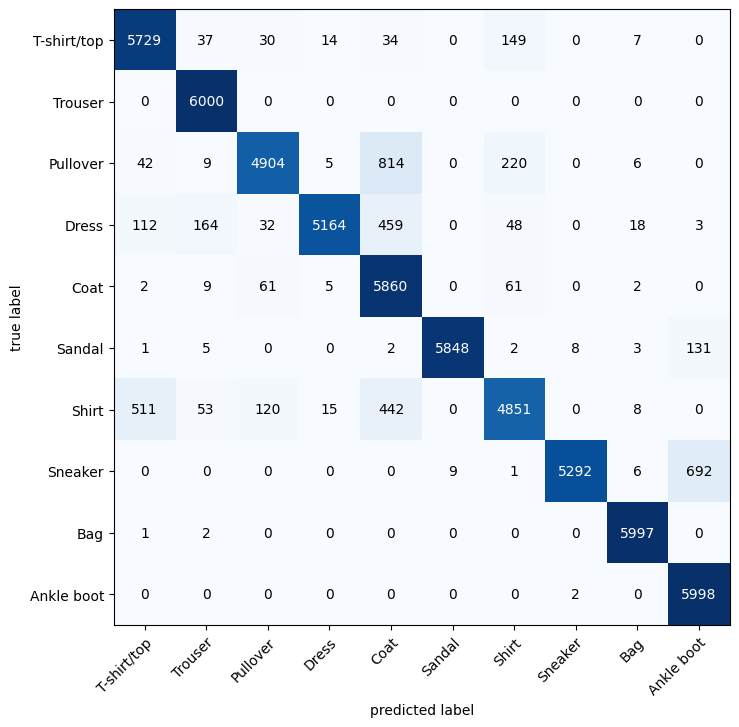

In [31]:
pred=model.predict(validation_batches)
pred=np.argmax(pred,axis=1)
true=tf.concat([y for x,y in validation_batches],axis=0)
mat=confusion_matrix(true,pred)
plot_confusion_matrix(conf_mat=mat,figsize=(8,8),class_names=metadata.features['label'].names)

In [32]:
model.save('models/fashion_mnist')